## Exploratory Data Analysis (EDA)

#### Bivariate Analysis (two variables)
###### Continuous & Continuous Data


In [32]:
# Scatterplot for continuous UDA
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv('titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Text(0, 0.5, 'Age')

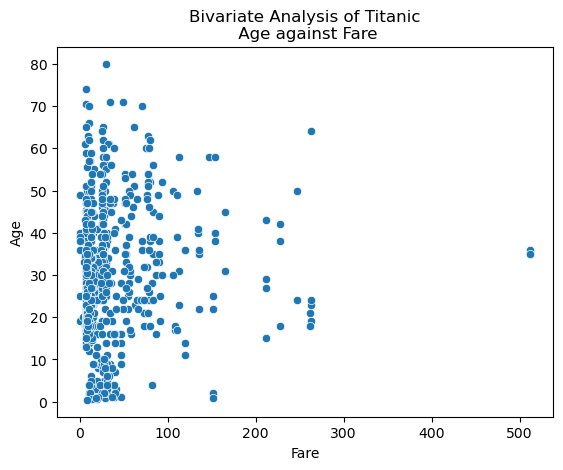

In [33]:
# Scatterplot for continuous BDA
sns.scatterplot(x=df.Fare, y=df.Age)
plt.title("Bivariate Analysis of Titanic\n Age against Fare")
plt.xlabel("Fare")
plt.ylabel("Age")

In [34]:
# Correlation between two variables with corr()
df[["Fare", "Age"]].corr() #low correlation indicates independence

,Fare,Age
Fare,1.000000,0.096067
Age,0.096067,1.000000


Text(0.5, 1.0, 'Titanic Heatmap\n of Fare-Age Correlation')

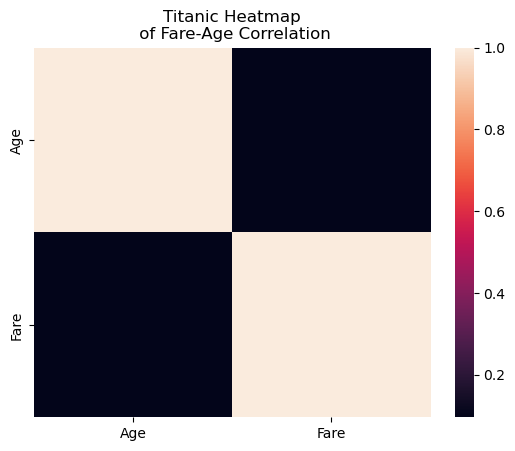

In [35]:
# Heatmap for continuous BDA
sns.heatmap(df[["Age", "Fare"]].corr())
plt.title("Titanic Heatmap\n of Fare-Age Correlation")

###### Categorical & Categorical Data

In [36]:
survived_ratio = df[["Pclass", "Survived"]].groupby("Pclass").sum()
survived_ratio

,Survived
Pclass,
1,136
2,87
3,119


Text(0, 0.5, 'Survived')

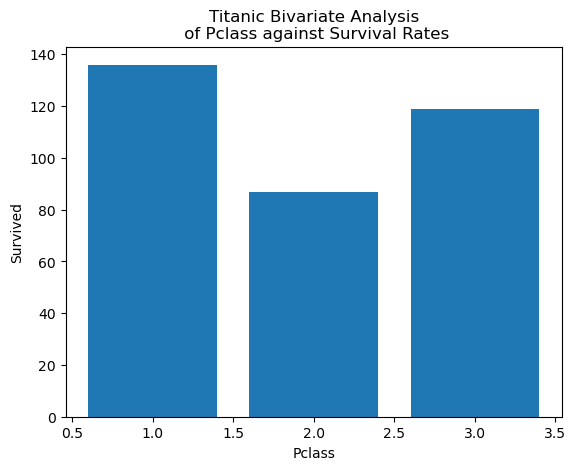

In [50]:
# Bar plot for categorical BDA
plt.bar(x=survived_ratio.index, height=survived_ratio.Survived)
plt.title("Titanic Bivariate Analysis\n of Pclass against Survival Rates")
plt.xlabel("Pclass")
plt.ylabel("Survived")

Text(0, 0.5, 'Survived')

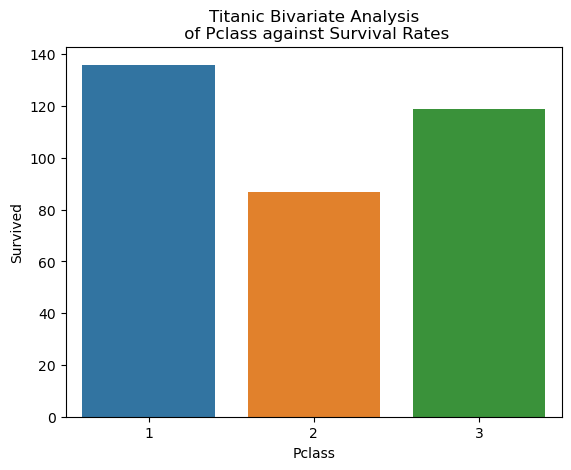

In [38]:
# Bar plot for categorical BDA
sns.barplot(x=survived_ratio.index, y=survived_ratio.Survived)
plt.title("Titanic Bivariate Analysis\n of Pclass against Survival Rates")
plt.xlabel("Pclass")
plt.ylabel("Survived")

###### Categorical & Categorical Data

Text(0, 0.5, 'Age')

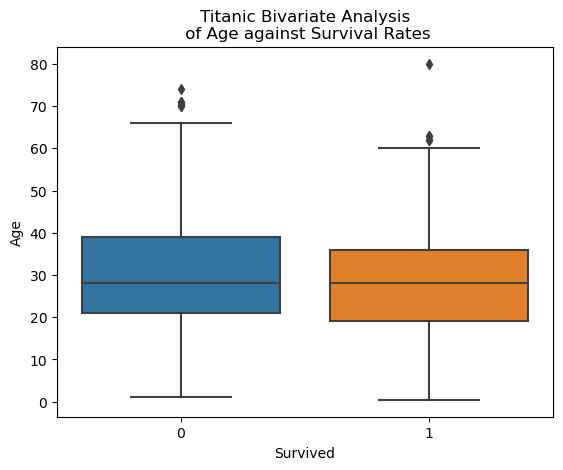

In [39]:
# Box plot for ccontinous and categorical data
sns.boxplot(x=df.Survived, y=df.Age)
plt.title("Titanic Bivariate Analysis\n of Age against Survival Rates")
plt.xlabel("Survived")
plt.ylabel("Age")

Text(0, 0.5, 'Age')

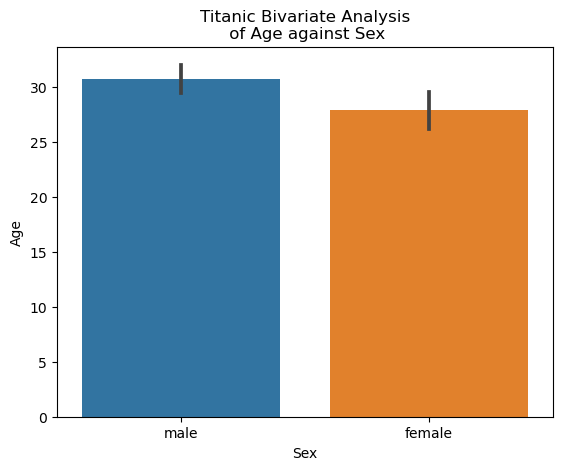

In [40]:
# Bar plot for continuous and categorical data
sns.barplot(x=df.Sex, y=df.Age)
plt.title("Titanic Bivariate Analysis\n of Age against Sex")
plt.xlabel("Sex")
plt.ylabel("Age")

In [41]:
# Detecting Outliers
x = pd.Series([1, 2, 3, 6, 7, 8, 150])
mean = x.mean()
std = x.std()
z_scores = abs((x - mean) / std)
z_scores

0    0.441104
1    0.422941
2    0.404778
3    0.350288
4    0.332125
5    0.313962
6    2.265198
dtype: float64

In [42]:
outliers_removed = x[z_scores <= 1.5]
outliers_removed

0    1
1    2
2    3
3    6
4    7
5    8
dtype: int64

In [43]:
# Median inputation for outlier treatment
import numpy as np
median = np.median(x)
median

6.0

In [44]:
x[z_scores >= 1.5] = median
x

0    1
1    2
2    3
3    6
4    7
5    8
6    6
dtype: int64

#### Categorical Variable Transformation

In [45]:
# Helps machines work with text by assigning numbers

## Label encoding: replace categorical data with numbers
## Frequecny encoding: replace categorical data with its frequency

In [46]:
# Label encoding
df_sex_name = df[0:5][["Name", "Sex"]]
df_sex_name

,Name,Sex
0,"Braund, Mr. Owen Harris",male
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female
2,"Heikkinen, Miss. Laina",female
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female
4,"Allen, Mr. William Henry",male


In [47]:
df_sex_name.Sex.replace({'male': 1, 'female': 0}, inplace=True)
df_sex_name

,Name,Sex
0,"Braund, Mr. Owen Harris",1
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0
2,"Heikkinen, Miss. Laina",0
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0
4,"Allen, Mr. William Henry",1


In [48]:
frequency = df.Sex.value_counts() / len(df.Sex)
frequency

Sex
male      0.647587
female    0.352413
Name: count, dtype: float64

In [49]:
df_name_freq = df[0:5][["Name", "Sex"]]
df_name_freq.Sex.replace({'male': frequency.male, 'female': frequency.female}, inplace=True)
df_name_freq

,Name,Sex
0,"Braund, Mr. Owen Harris",0.647587
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.352413
2,"Heikkinen, Miss. Laina",0.352413
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.352413
4,"Allen, Mr. William Henry",0.647587
